In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv('Aston Villa Results.csv')
df['num'] = range(1, len(df) + 1)
df.to_csv('new Aston Villa Stats.csv', index=False)

In [70]:
df.tail()

,Date,Venue,Result,GF,GA,xG,xGA,Poss,Manager,num
66,2023-04-04,Away,W,2,1,1.0,0.5,64,Emery,67
67,2023-04-08,Home,W,2,0,1.3,0.2,63,Emery,68
68,2023-04-15,Home,W,3,0,1.9,0.5,52,Emery,69
69,2023-04-22,Away,D,1,1,1.5,2.7,56,Emery,70
70,2023-04-25,Home,W,1,0,1.0,0.1,51,Emery,71


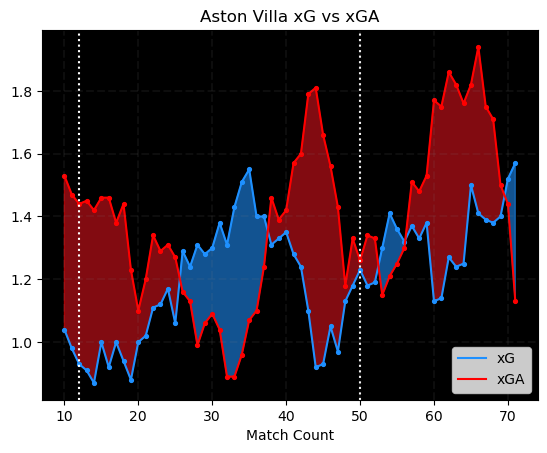

In [84]:
x = df['num']
y1 = df['xG'].rolling(window=10).mean()
y2 = df['xGA'].rolling(window=10).mean()


fig, ax = plt.subplots()

ax.plot(x, y1, label='xG', color = 'dodgerblue')
ax.plot(x, y2, label='xGA', color = 'red')


ax.fill_between(x, y1, y2, alpha=0.2)


x_value = 12
ax.axvline(x=x_value, color='white', linestyle='dotted')

x_value = 50 
ax.axvline(x=x_value, color='white', linestyle='dotted')

ax.fill_between(x, y1, y2, where=y1 > y2, interpolate=True, alpha=0.5, color='dodgerblue')
ax.fill_between(x, y1, y2, where=y2 >= y1, interpolate=True, alpha=0.5, color='red')

ax.scatter(x, y1, color='dodgerblue', s=7.5)
ax.scatter(x, y2, color='red', s=7.5)

for i in range(10, 80, 10):
    ax.axvline(x=i, linestyle='--', color='grey', alpha=0.1)

for i in range(1, 10):
    y_pos = 0.8 + (i * 0.2)
    if y_pos > 1.8:
        break
    ax.axhline(y=y_pos, linestyle='--', color='grey', alpha=0.1)


ax.set_facecolor('black')
ax.set_xlabel('Match Count')
plt.title('Aston Villa xG vs xGA')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans serif'

ax.legend()
plt.show()

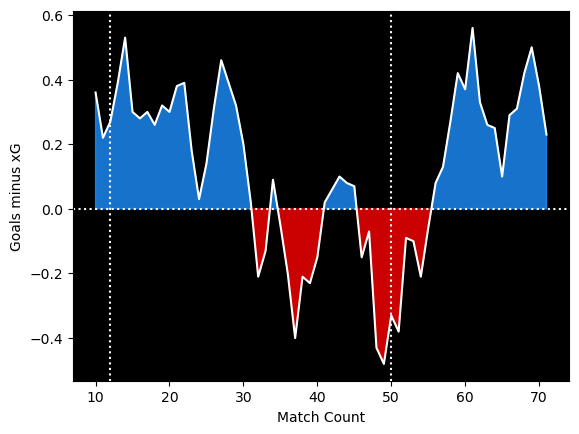

In [36]:
x = df['num']
y1 = df['GF'].rolling(window=10).mean()
y2 = df['xG'].rolling(window=10).mean()
# add more lines as needed

diff = y1 - y2

fig, ax = plt.subplots()

ax.plot(x, diff, label='Difference', color = 'white')
# add more lines as needed


ax.fill_between(x, diff, where=(diff >= 0), interpolate=True, color='dodgerblue', alpha=0.8)
ax.fill_between(x, diff, where=(diff < 0), interpolate=True, color='red', alpha=0.8)

ax.axhline(0, linestyle='dotted', color='white')

x_value = 12 # replace with the actual value from the CSV file
ax.axvline(x=x_value, color='white', linestyle='dotted')

x_value = 50 # replace with the actual value from the CSV file
ax.axvline(x=x_value, color='white', linestyle='dotted')

ax.set_facecolor('black')

ax.set_ylabel('Goals minus xG')
ax.set_xlabel('Match Count')

plt.show()
